1. Tổng quan về MTCNN (Multi-task Cascaded Convolutional Networks):

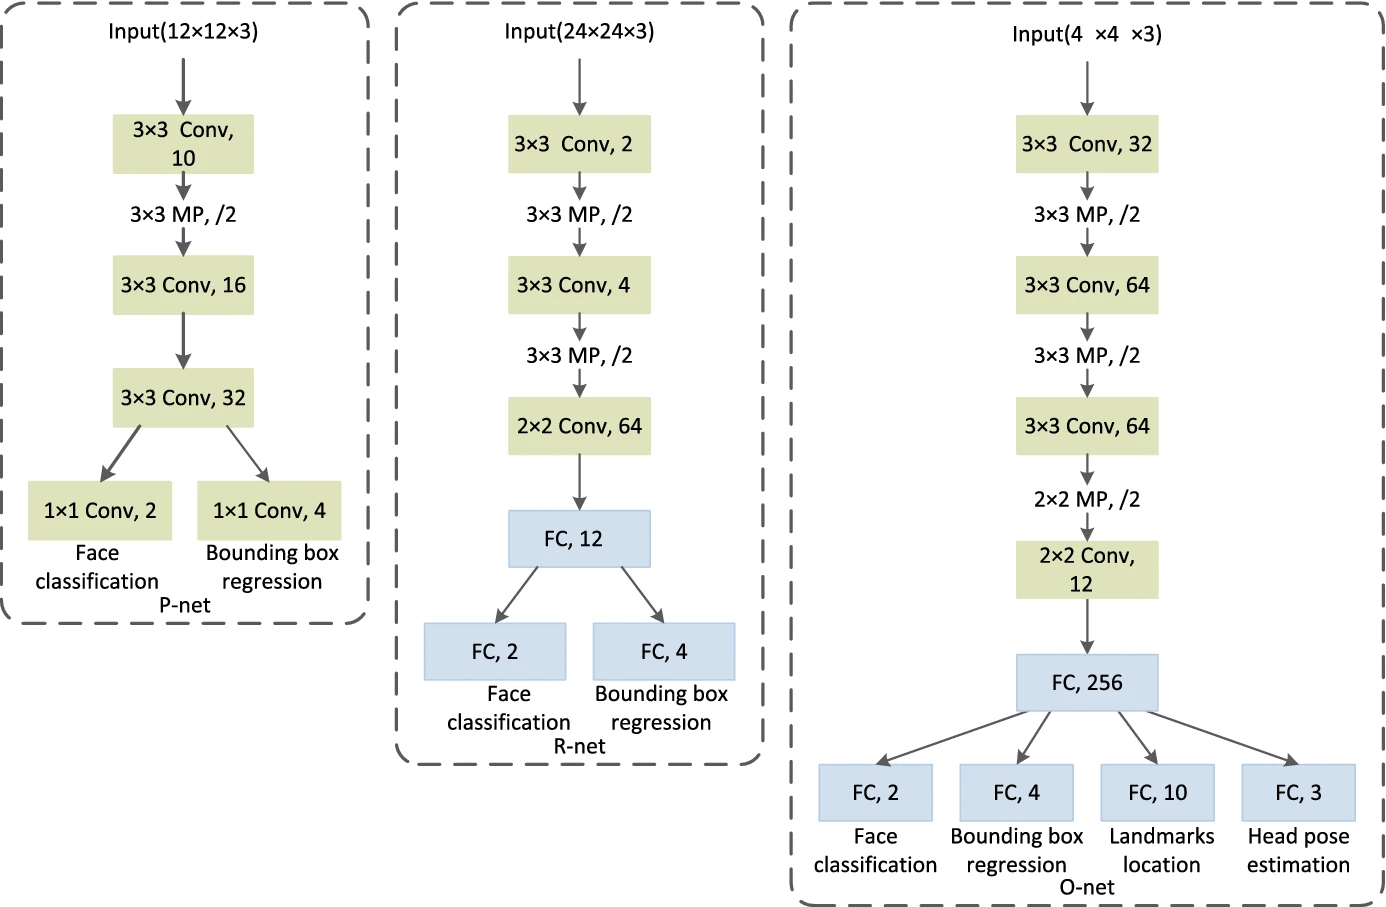
Phần đầu tiên sẽ là về Face Detection, một bài toán với nhiệm vụ phát hiện các khuôn mặt có trong ảnh hoặc frame trong Video. Mạng MTCNN sẽ giúp chúng ta điều này với 3 lớp mạng khác biệt, tượng trưng cho 3 stage chính là P-Net, R-Net và O-Net (PRO!) 

**Tóm tắt về các bước của mtcnn**:

P-Net (Proposal Network): Đề xuất các bounding box và điểm mốc khuôn mặt ban đầu.
R-Net (Refine Network): Tinh chỉnh các bounding box và điểm mốc từ P-Net.
O-Net (Output Network): Cung cấp các kết quả cuối cùng cho bounding box và điểm mốc.

### Cụ thể: 
Đầu tiên ảnh sẽ được rescale để nhận được image pyramid giúp mô hình có thể phát hiện khuôn mặt với các kích thước khác nhau.
**pyramid image**: Trước hết, một bức ảnh thường sẽ có nhiều hơn một người - một khuôn mặt. Ngoài ra, những khuôn mặt thường sẽ có kích thước khác nhau. Ta cần một phương thức để có thể nhận dạng toàn bộ số khuôn mặt đó, ở các kích thước khác nhau. MTCNN đưa cho chúng ta một giải pháp, bằng cách sử dụng phép Resize ảnh, để tạo một loạt các bản copy từ ảnh gốc với kích cỡ khác nhau, từ to đến nhỏ, tạo thành 1 Image Pyramid.

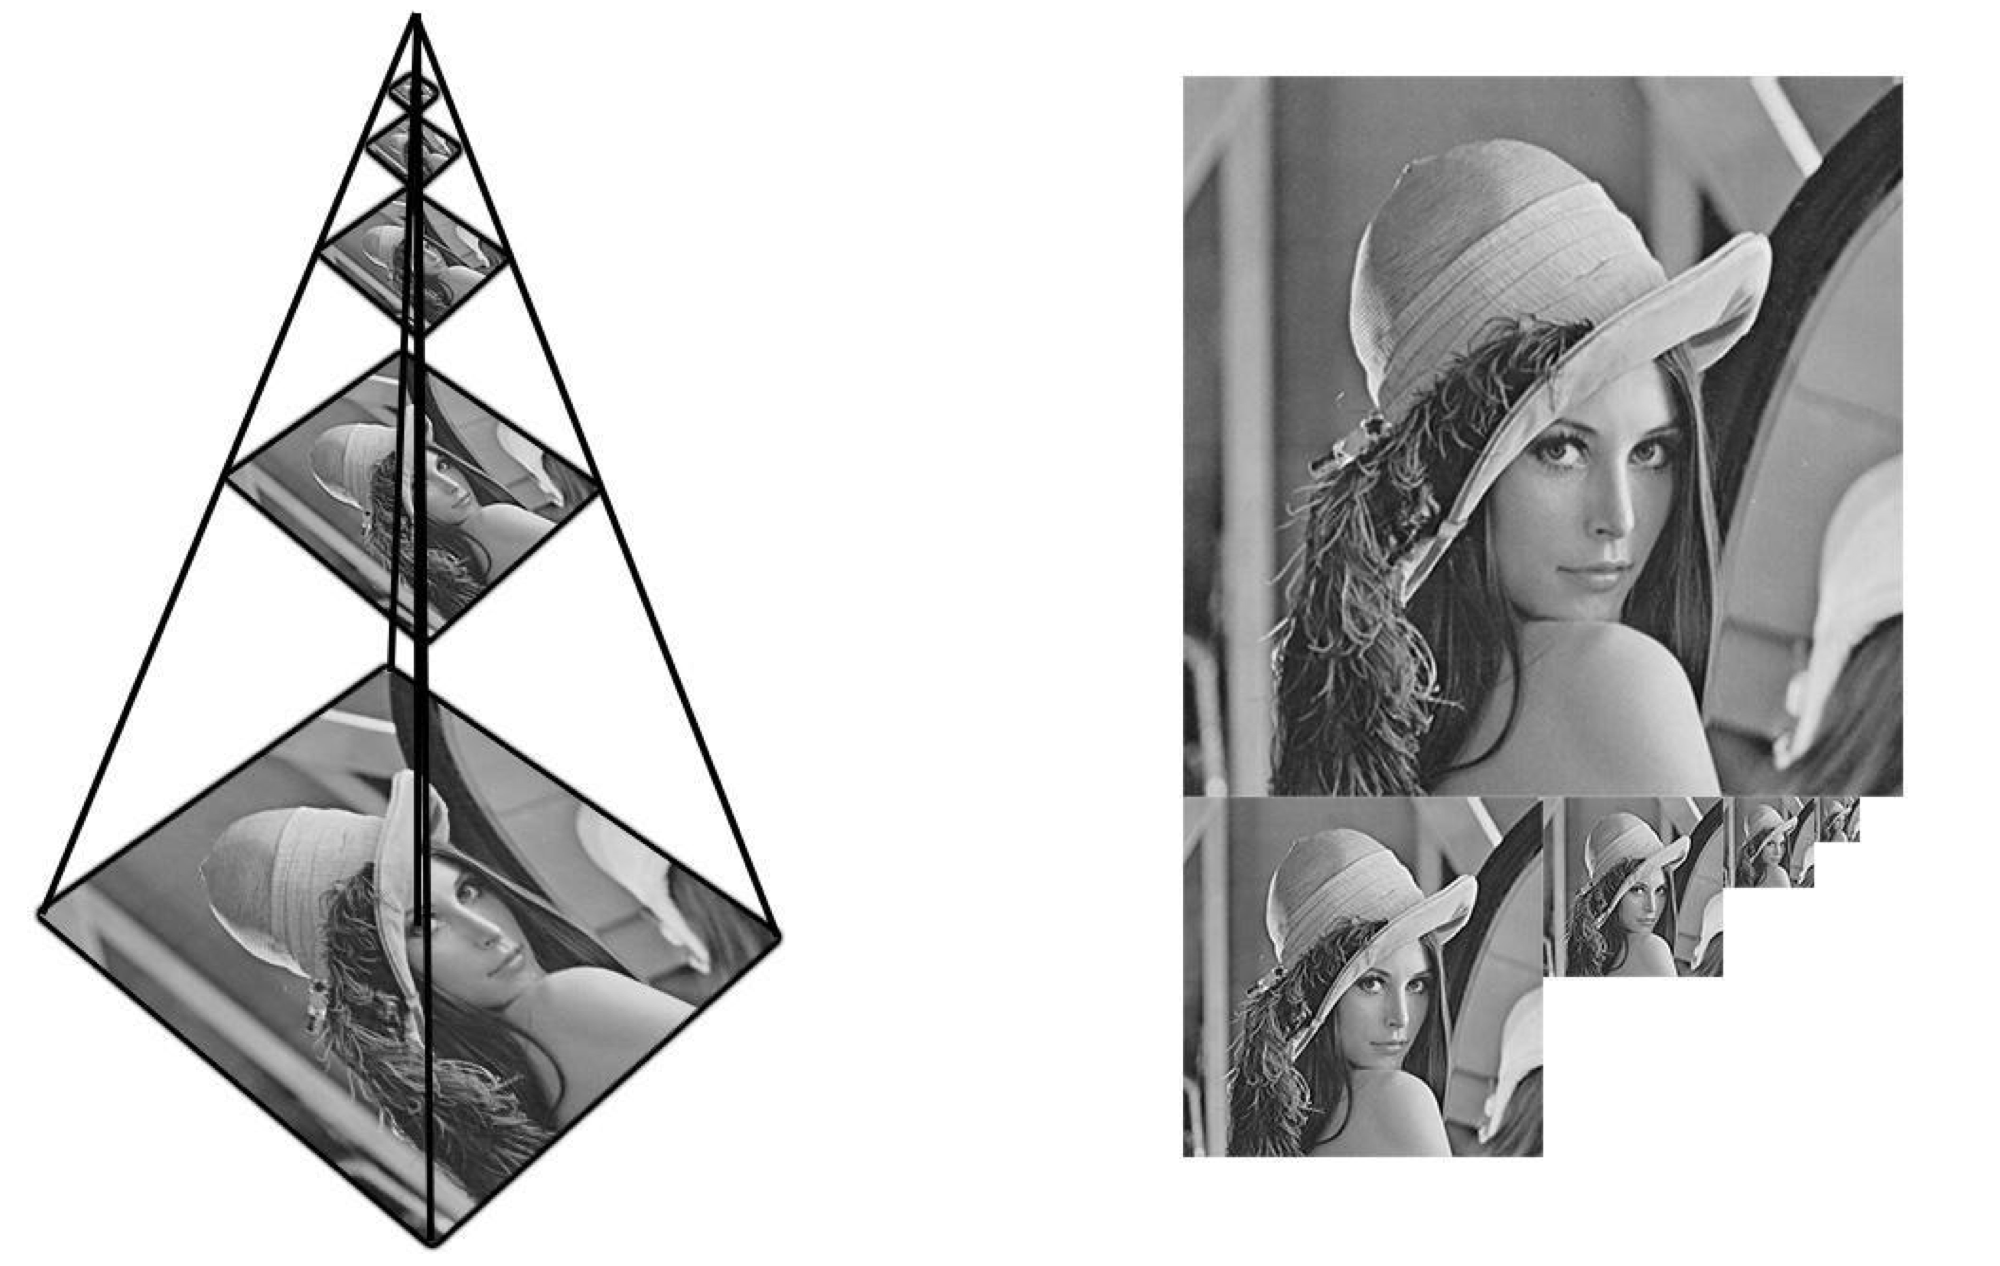

#### B1: The proposal network(P-net)
Ở bước đầu tiên sẽ sử dụng mạng FCN (fully convolutional network). Mạng FCN khác mạng CNN ở chỗ mạng FCN không sử dụng lớp Dense layer. P-Net được sử dụng để có được các windows tiềm năng và bounding box regression vectors của chúng (tọa độ).

Bounding box regression là kỹ thuật để dự đoán vị trí của bounding box khi chúng ta cần phát hiện đối tượng (ở đây là khuôn mặt). Sau khi có được tọa độ của bounding boxes một vài tinh chỉnh được thực hiện để loại bỏ một số bounding boxes overlap với nhau (xem trong code sẽ có). Đầu ra của bước này là tất cả bounding boxes sau khi đã thực hiện sàng lọc.

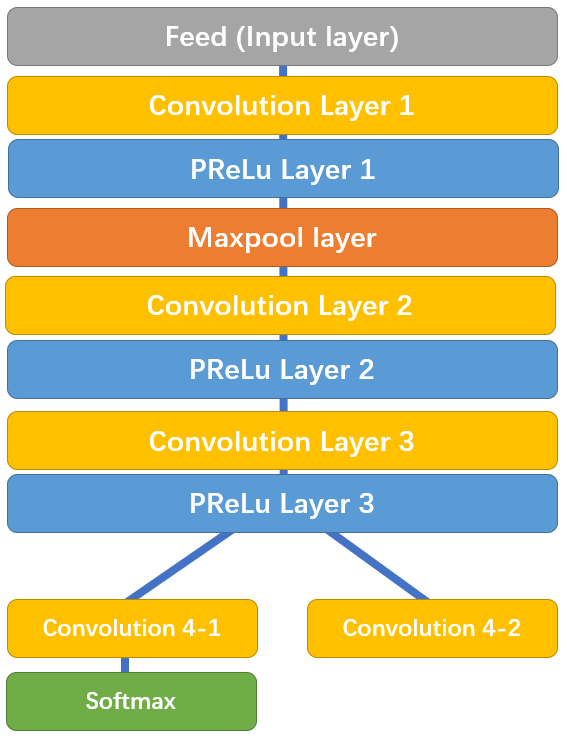

Ở đây có dùng PRelu layer (nói đơn giản giá trị không âm thì giữ nguyên, giá trị âm sẽ được nhân với hệ số 
, hệ số này được học trong quá trình training), mọi người có thể xem chi tiết tại đây https://keras.io/api/layers/activation_layers/prelu/

Chú ý sau PReLu layer 3 tách thành 2 nhánh, nhánh 4-2 dùng để dự đoán tọa độ của bounding box, nhánh 4-1 dùng để dự đoán xác suất xuất hiện khuôn mặt trong bounding box.
## Bước 2: The Refine Network (R-Net)
Tất cả bounding boxes từ P-Net được đưa vào R-Net. Chú ý rằng R-Net là mạng CNN chứ không phải FCN. R-Net giảm số lượng bounding boxes xuống, tinh chỉnh lại tọa độ, có áp dụng Non-max suppression.

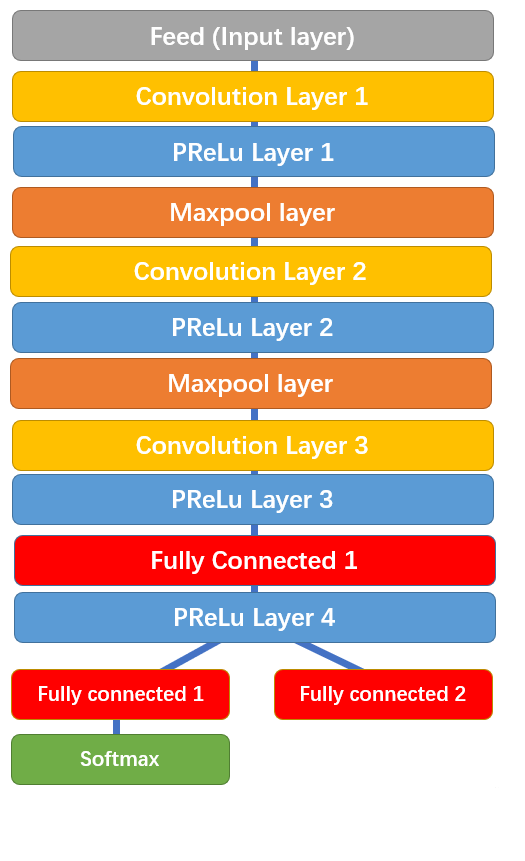

Ở đây cũng có 2 nhánh để dự đoán xuất hiện khuôn mặt hay không và tọa độ của bounding boxes.

Chú ý: có một số phiên bản modified ví dụ ở R-Net có xác định facial landmarks, khi nói chúng ta sẽ đề cập đến một kiến trúc cụ thể.
## Bước 3: The Output Network (O-Net)
Đầu ra của R-Net được sử dụng làm đầu vào của O-Net. Trong O-Net có đưa ra vị trí của facial landmarks (2 mắt, mũi, 2 vị trí của miệng). Như hình trên có thể thấy gần cuối chúng ta có 3 nhánh: xác suất xuất hiện khuôn mặt, tọa độ bounding box, tọa độ của facial landmarks (mỗi vị trí có tọa độ x và y, cái này ảnh hưởng đến số lượng units trong layer).

Chú ý: Như hình bên trên model được modified lại, O-Net có dự đoán cả head pose.

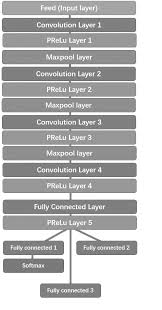

### 3 nhiệm cụ của MTCNN
1. Face classification
Đây là binary classification nên dùng loss function như sau:

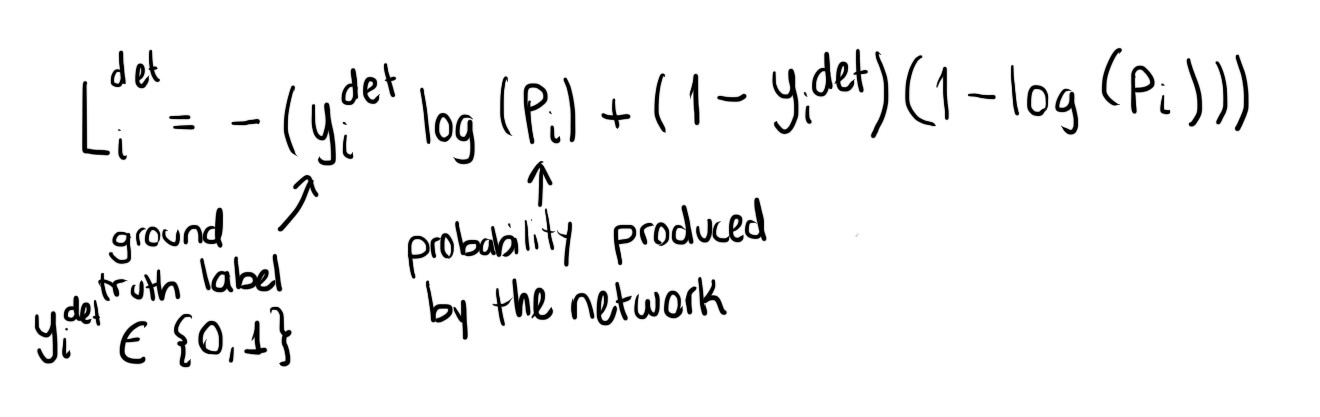

2. Bounding box regression
Đây là bài toán regression. Đối với mỗi window (bounding box) offset (độ lệch) giữa bounding box và ground truth bounding box được tính. Eucledian loss được áp dụng cho trường hợp này.

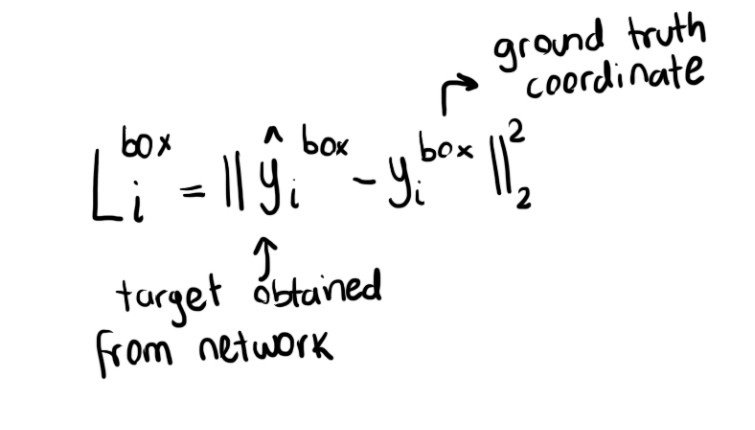

3. Facial landmark localization
Xác định vị trí của facial landmarks. Đây cũng là bài toán regression.

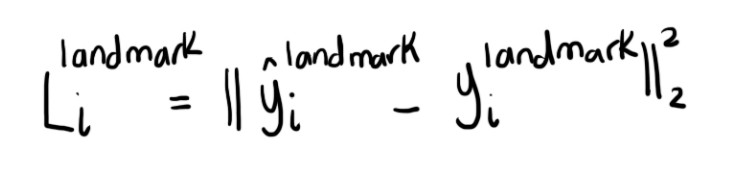

Có 5 landmraks: left eye, right eye, nose, left mounth corner, right mounth corners.

Kết luận
Trên đây chúng ta đã cùng tìm hiểu về kiến trúc của MTCNN. Tóm lại MTCNN gồm 3 thành phần chính: P-Net, R-Net và O-Net. MTCNN ngoài việc được sử dụng để phát hiện khuôn mặt có thể được dùng để detect các object khác như biển số, xe…